# K-Nearest Neighbours
This notebook focuses on plotting graphs for analysis. For training, testing, and fine-tuning the model, please refer to the respective model's notebooks
1. [Importing Necessary Libraries and Dataset](#chapter-1---import-libraries-and-dataset)
2. [Simple Analysis](#chapter-2---simple-analysis)
3. [Visualisation of data](#chapter-3---visualisation-of-data)
    - [Numerical Data](#histogram-of-numerical-data)
    - [Categorical Data](#grouped-plots-of-categorical-data)
4. [Bivariate Analysis (vs Cardiovascular Risk)](#chapter-4---bivariate-analysis)
    - [Age](#age-vs-cardiovascular-risk)
    - [BMI](#bmi-vs-cardiovascular-risk)
    - [Gender](#gender-vs-cardiovasular-risk)
    - [Lifestyle](#lifestyle-vs-cardiovascular-risk)
5. [Additional Analysis](#chapter-5---additional-analysis)

# Chapter 1 - Import Libraries and Dataset
This chapter involves importing necessary libraries such as:
1. pandas
2. numpy
3. matplotlib
    - Plotting graphs
4. seaborn 
    - Plotting graphs
5. typing
    - Type indicate

The dataset is also imported in this chapter

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [6]:
cardio_df:pd.DataFrame = pd.read_csv("dataset.csv")
cardio_df.head()

,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium


#  Chapter 2 - Simple Analysis
This chapter involves finding out the basic details such as:
1. Number of rows and columns
2. Datatype of each feature 
3. Basic descriptive statistics of numerical data

We also determine what kind of cleaning the dataset requires

In [7]:
row, column = cardio_df.shape
print(f"The number of rows: {row}\nThe number of columns: {column}\n")
print(f'The columns in the dataset are as follows:\n{list(cardio_df.columns)}')

The number of rows: 2100
The number of columns: 18

The columns in the dataset are as follows:
['Gender', 'Age', 'Height(cm)', 'Weight(kg)', 'Family_history', 'Alcohol', 'Junk_food', 'Vege_day', 'Meals_day', 'Snack', 'Smoking', 'Water_intake(L)', 'Transportation', 'Exercise', 'TV', 'Income', 'Discipline', 'Cardiovascular_risk(y)']


In [8]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

In [9]:
cardio_df.describe()

,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


# Chapter 3 - Visualisation of data
Histograms, boxplot, piecharts, bargraphs are all plotted to determine the distribution of data
1. [Numerical Data](#histogram-of-numerical-data)
2. [Categorical Data](#grouped-plots-of-categorical-data)

## Histogram of Numerical Data
1. [Overall](#grouped-histogram)
2. [Age](#age)
3. [Height](#height)
4. [Weight](#weight)
5. [BMI](#bmi)

### Grouped Histogram

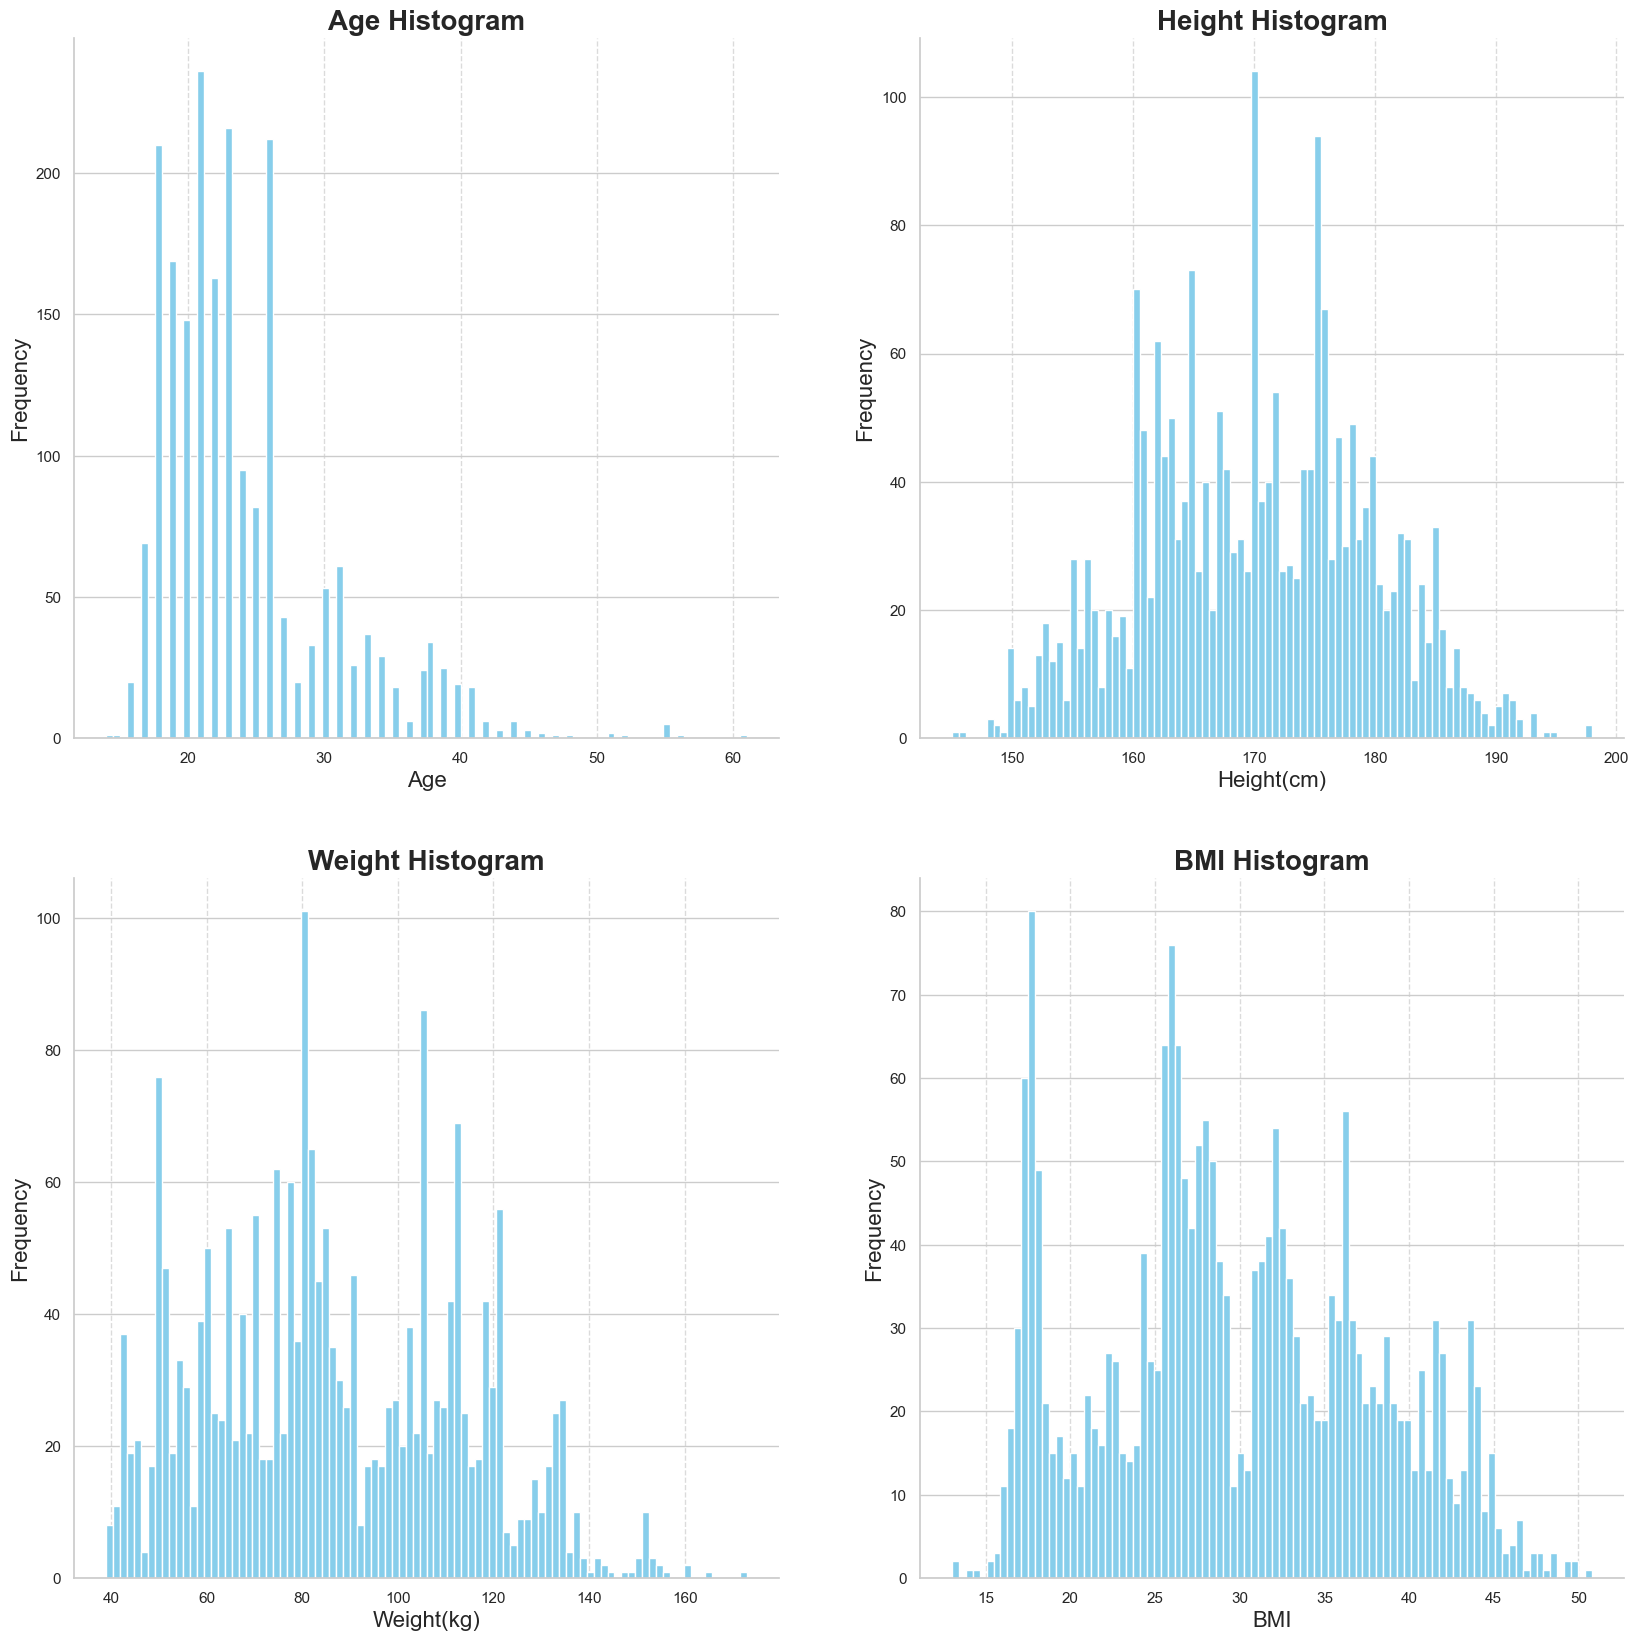

In [32]:
figure, ax = plt.subplots(2, 2, figsize=(20, 20))
ax[0,0].hist(cardio_df['Age'], bins= math.ceil(2 * math.sqrt(row)), color='skyblue')
ax[0,0].set_title("Age Histogram")
ax[0,0].set_ylabel("Frequency")
ax[0,0].set_xlabel("Age")

ax[0,1].hist(cardio_df['Height(cm)'], bins= math.ceil(2 * math.sqrt(row)), color='skyblue')
ax[0,1].set_title("Height Histogram")
ax[0,1].set_ylabel("Frequency")
ax[0,1].set_xlabel("Height(cm)")

ax[1,0].hist(cardio_df['Weight(kg)'], bins= math.ceil(2 * math.sqrt(row)), color='skyblue')
ax[1,0].set_title("Weight Histogram")
ax[1,0].set_ylabel("Frequency")
ax[1,0].set_xlabel("Weight(kg)")

ax[1,1].hist((cardio_df['Weight(kg)']/np.square(cardio_df['Height(cm)']/100)), bins= math.ceil(2 * math.sqrt(row)), color='skyblue')
ax[1,1].set_title("BMI Histogram")
ax[1,1].set_ylabel("Frequency")
ax[1,1].set_xlabel("BMI")


for axis in ax.flat:
    plt.setp(axis.get_xticklabels(), rotation=0, ha="center")
    plt.setp(axis.title, fontsize= 20, fontweight='bold')
    axis.set_xlabel(axis.get_xlabel(), fontsize=16)
    axis.set_ylabel(axis.get_ylabel(), fontsize=16)
    axis.grid(True, axis='x', linestyle='--', alpha=0.7)
    axis.spines[['right', 'top']].set_visible(False)

plt.show()



### Age

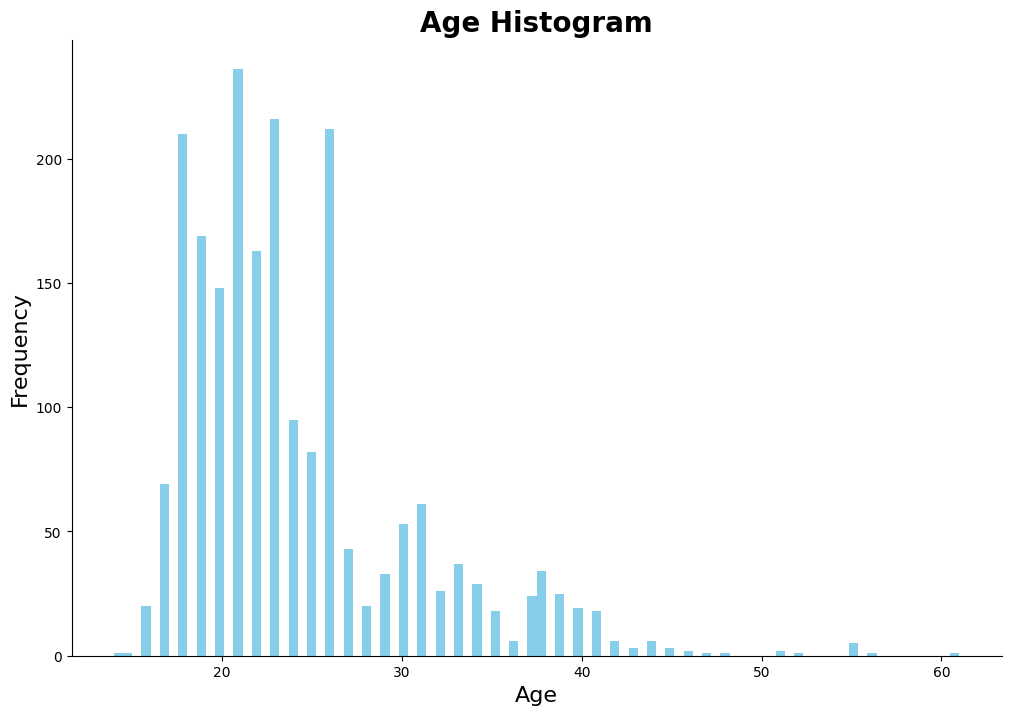

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(cardio_df['Age'], bins= math.ceil(2 * math.sqrt(row)), color='skyblue')
ax.set_title("Age Histogram", fontweight = 'bold', fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 16)
ax.set_xlabel("Age", fontsize = 16)
ax.spines[['right', 'top']].set_visible(False)
plt.show()

### Height

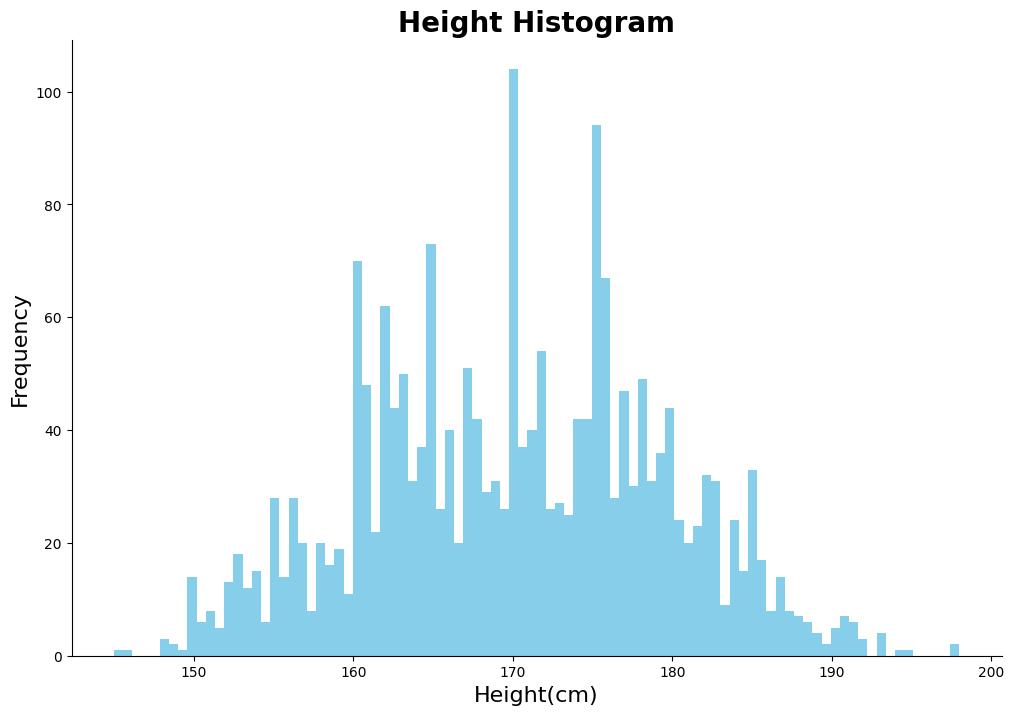

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(cardio_df['Height(cm)'], bins= math.ceil(2 * math.sqrt(row)), color='skyblue')
ax.set_title("Height Histogram", fontweight = 'bold', fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 16)
ax.set_xlabel("Height(cm)", fontsize = 16)
ax.spines[['right', 'top']].set_visible(False)
plt.show()

### Weight

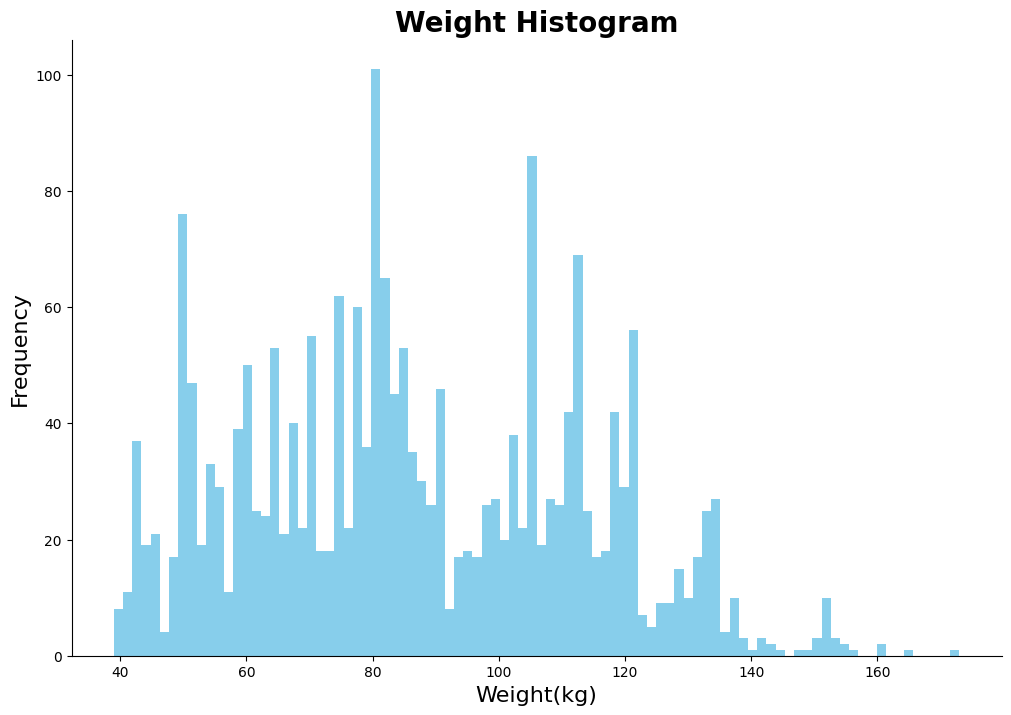

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(cardio_df['Weight(kg)'], bins= math.ceil(2 * math.sqrt(row)), color='skyblue')
ax.set_title("Weight Histogram", fontweight = 'bold', fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 16)
ax.set_xlabel("Weight(kg)", fontsize = 16)
ax.spines[['right', 'top']].set_visible(False)
plt.show()

### BMI 

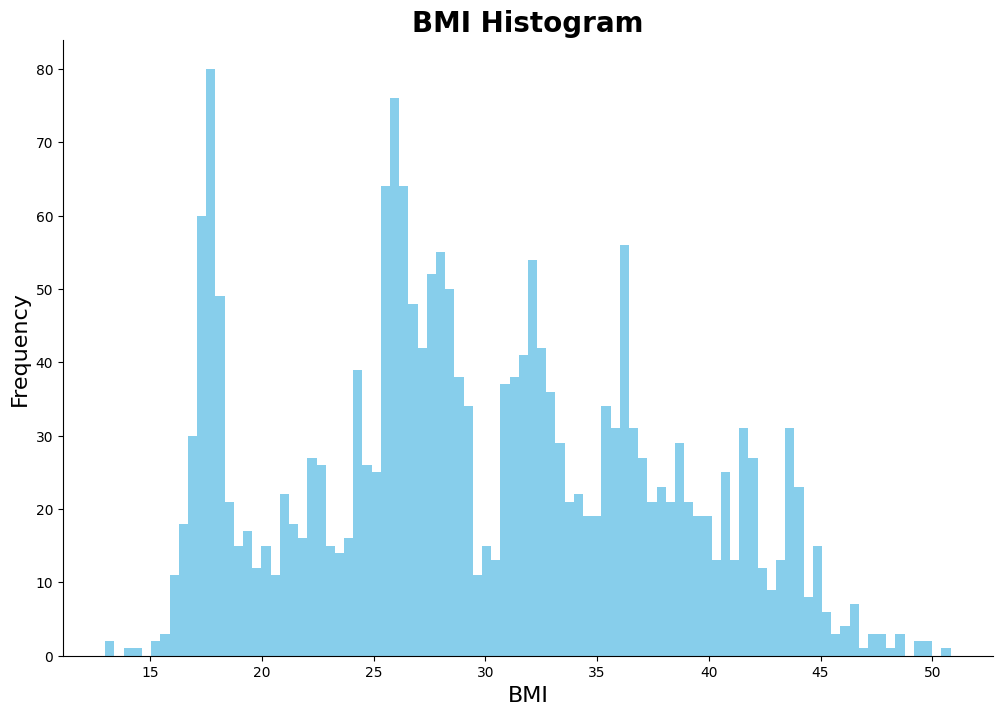

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist((cardio_df['Weight(kg)']/np.square(cardio_df['Height(cm)']/100)), bins= math.ceil(2 * math.sqrt(row)), color='skyblue')
ax.set_title("BMI Histogram", fontweight = 'bold', fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 16)
ax.set_xlabel("BMI", fontsize = 16)
ax.spines[['right', 'top']].set_visible(False)
plt.show()

## Grouped plots of categorical data
1. [Cardiovascular Risk](#cardiovascular-risk)
2. [Other features](#subplots-of-features)

In [15]:
LIGHT_GRAY:str = '#D3D3D3'
GREEN:str = '#28a745'
YELLOW:str = '#FFFACD'
ORANGE:str = '#FFD700'
RED:str = '#FF0000'
BLUE:str = '#1f77b4'
PINK:str = '#ff69b4'

### Cardiovascular Risk

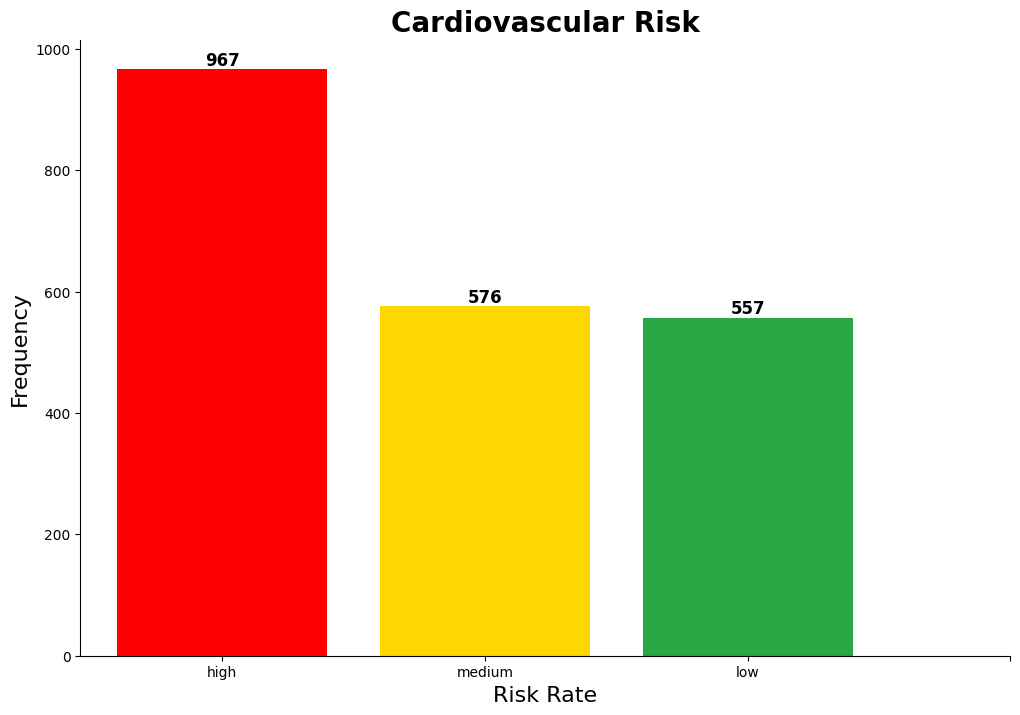

In [16]:
fig, ax = plt.subplots(figsize = (12,8))
risk_bar = ax.bar(cardio_df['Cardiovascular_risk(y)'].value_counts().index,
                       cardio_df['Cardiovascular_risk(y)'].value_counts().values,
                       color = [RED, ORANGE, GREEN,BLUE])
ax.set_xticks([0,1,2,3])
ax.set_ylabel("Frequency", fontsize = 16)
ax.set_xlabel("Risk Rate", fontsize = 16)
ax.set_title("Cardiovascular Risk", fontweight='bold', fontsize = 20)
ax.spines[['right', 'top']].set_visible(False)
for bar in risk_bar:
    height = bar.get_height()
    ax.text(        
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{int(height)}',  # Converts the count to an integer and adds it as text
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
        )
plt.show()

### Subplots of features

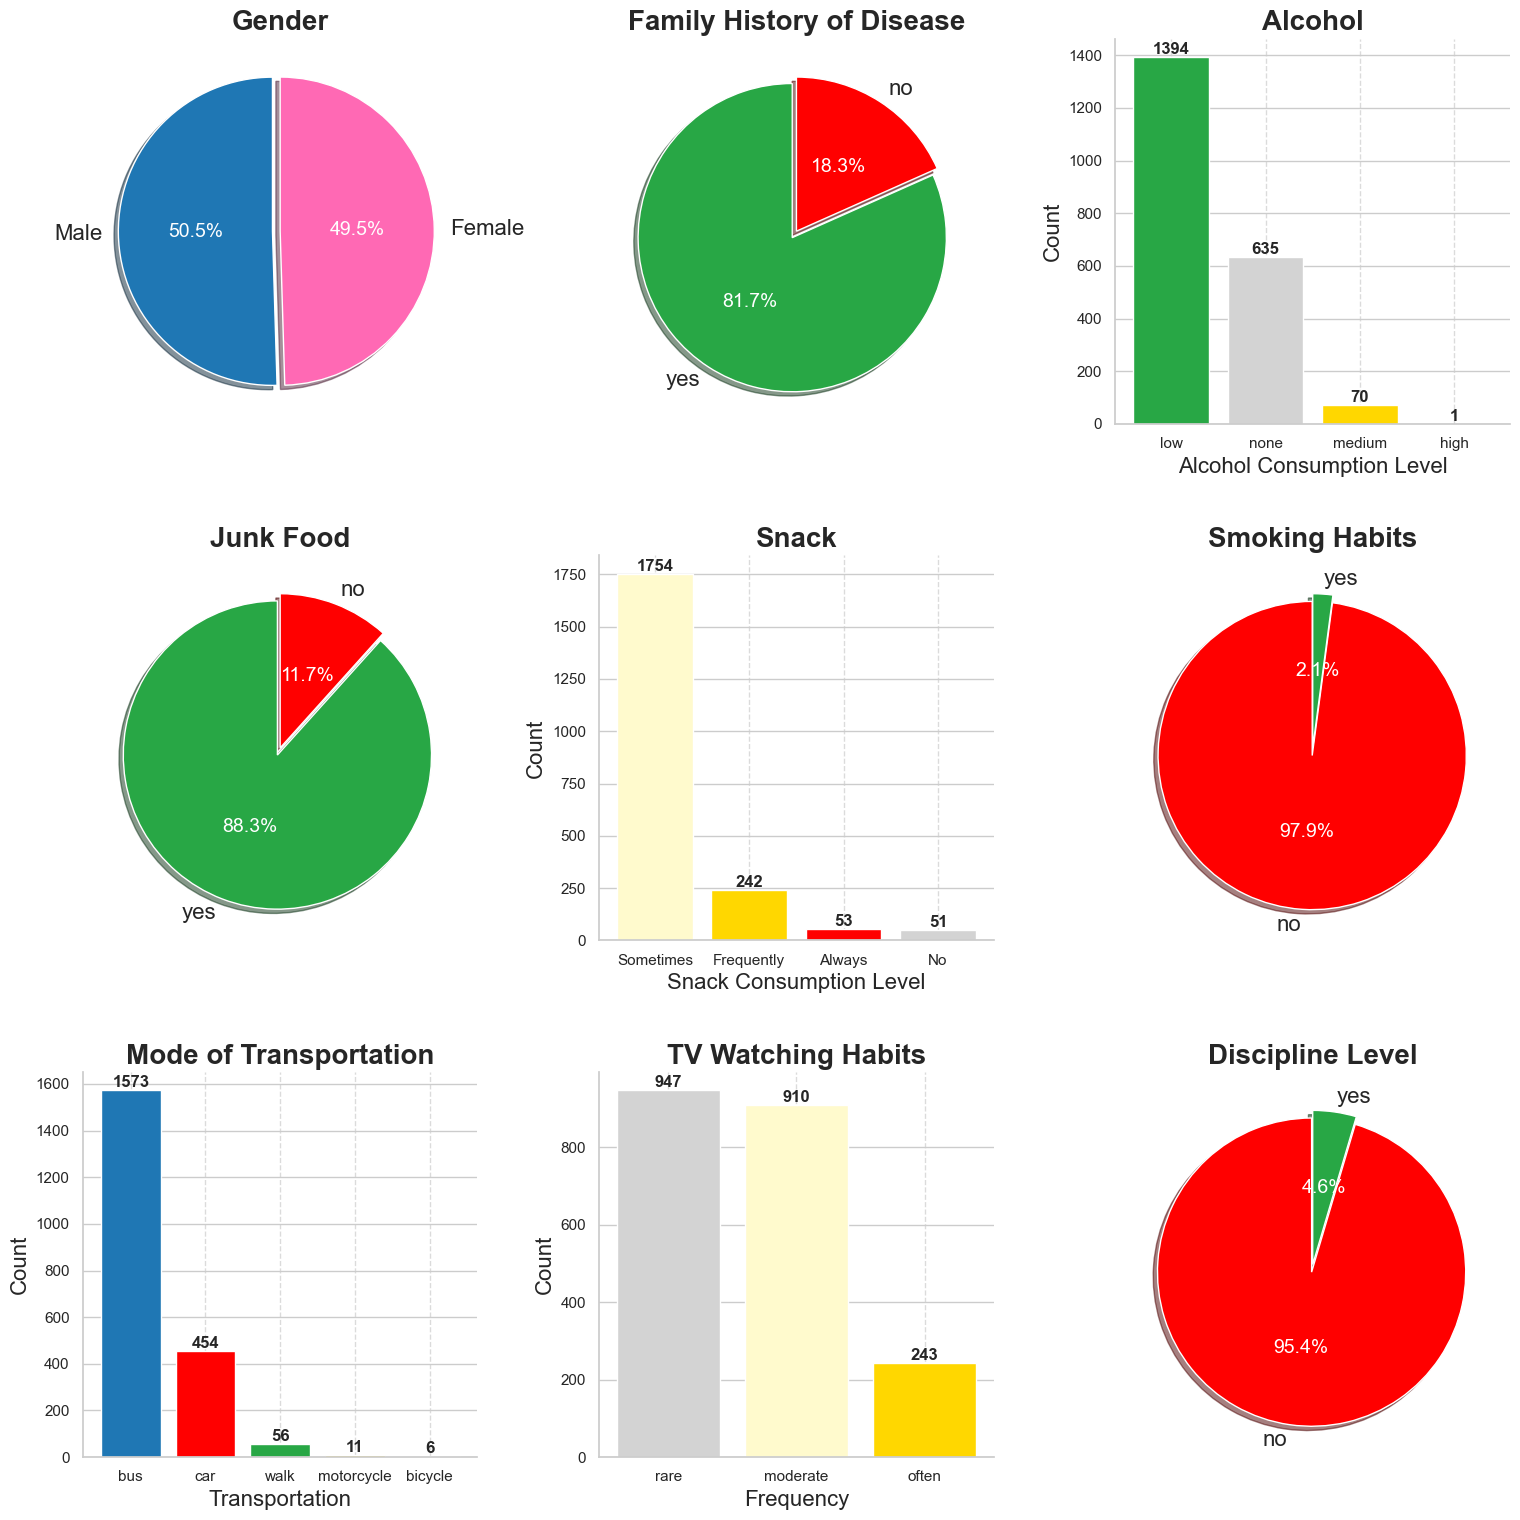

In [24]:
# Adjust the figure size to make the subplots larger
figure, axis = plt.subplots(3, 3, figsize=(16, 16))

wedges, texts, autotexts = axis[0, 0].pie(
            cardio_df['Gender'].value_counts().values, 
            labels= cardio_df['Gender'].value_counts().index,
            startangle = 90,
            autopct='%1.1f%%',
            pctdistance = 0.5,
            textprops={'fontsize': 16},
            colors = [BLUE, PINK],
            shadow= True,
            explode=(0.05,0))
axis[0, 0].set_title('Gender')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

wedges, texts, autotexts = axis[0, 1].pie(
            cardio_df['Family_history'].value_counts().values,
            labels = cardio_df['Family_history'].value_counts().index,
            startangle = 90,
            autopct='%1.1f%%',
            pctdistance = 0.5,
            textprops={'fontsize': 16},
            colors=[GREEN, RED],
            shadow = True,
            explode = (0.05, 0))
axis[0, 1].set_title('Family History of Disease')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

alcohol_bar = axis[0, 2].bar(
            cardio_df['Alcohol'].value_counts().index, 
            cardio_df['Alcohol'].value_counts().values,
            color=[GREEN, LIGHT_GRAY, ORANGE, RED])
axis[0,2].set_title('Alcohol')
axis[0,2].set_xlabel('Alcohol Consumption Level',fontsize = 16)
axis[0,2].set_ylabel('Count')
for bar in alcohol_bar:
    height = bar.get_height()
    axis[0,2].text(        
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{int(height)}',  # Converts the count to an integer and adds it as text
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold')


wedges, texts, autotexts = axis[1, 0].pie(
            cardio_df['Junk_food'].value_counts().values,
            labels = cardio_df['Junk_food'].value_counts().index, 
            startangle = 90,
            autopct='%1.1f%%',
            pctdistance = 0.5,
            textprops={'fontsize': 16},
            colors=[GREEN, RED],
            shadow=True,
            explode = (0.05, 0))
axis[1, 0].set_title('Junk Food')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

snack_bar = axis[1, 1].bar(
            cardio_df['Snack'].value_counts().index, 
            cardio_df['Snack'].value_counts().values,
            color=[YELLOW,ORANGE,RED, LIGHT_GRAY])
axis[1,1].set_title('Snack')
axis[1,1].set_xlabel('Snack Consumption Level')
axis[1,1].set_ylabel('Count')
for bar in snack_bar:
    height = bar.get_height()
    axis[1,1].text(        
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{int(height)}',  # Converts the count to an integer and adds it as text
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold')

wedges, texts, autotexts = axis[1, 2].pie(
            cardio_df['Smoking'].value_counts().values,
            labels = cardio_df['Smoking'].value_counts().index,
            startangle = 90,
            autopct='%1.1f%%',
            pctdistance = 0.5,
            textprops={'fontsize': 16},
            colors=[RED, GREEN],
            shadow=True,
            explode = (0.05, 0))
axis[1, 2].set_title('Smoking Habits')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

transport_bar = axis[2,0].bar(
            cardio_df['Transportation'].value_counts().index, 
            cardio_df['Transportation'].value_counts().values,
            color=[BLUE, RED, GREEN, ORANGE, YELLOW])
axis[2,0].set_title('Mode of Transportation')
axis[2,0].set_xlabel('Transportation')
axis[2,0].set_ylabel('Count')
for bar in transport_bar:
    height = bar.get_height()
    axis[2,0].text(        
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{int(height)}',  # Converts the count to an integer and adds it as text
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold')

tv_bar = axis[2, 1].bar(
            cardio_df['TV'].value_counts().index, 
            cardio_df['TV'].value_counts().values,
            color=[LIGHT_GRAY, YELLOW, ORANGE])
axis[2,1].set_title('TV Watching Habits')
axis[2,1].set_xlabel('Frequency')
axis[2,1].set_ylabel('Count')
for bar in tv_bar:
    height = bar.get_height()
    axis[2,1].text(        
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{int(height)}',  # Converts the count to an integer and adds it as text
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold')

wedges, texts, autotexts = axis[2, 2].pie(
            cardio_df['Discipline'].value_counts().values,
            labels = cardio_df['Discipline'].value_counts().index,
            startangle = 90,
            autopct='%1.1f%%',
            pctdistance = 0.5,
            textprops={'fontsize': 16},
            colors =[RED, GREEN],
            shadow=True,
            explode = (0.05,0))
axis[2, 2].set_title('Discipline Level')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

# Rotate x-axis labels to prevent overlapping
for ax in axis.flat:
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
    plt.setp(ax.title, fontsize= 20, fontweight='bold')
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)
    ax.spines[['right', 'top']].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout(pad=3.0)

# Display the plots
plt.show()

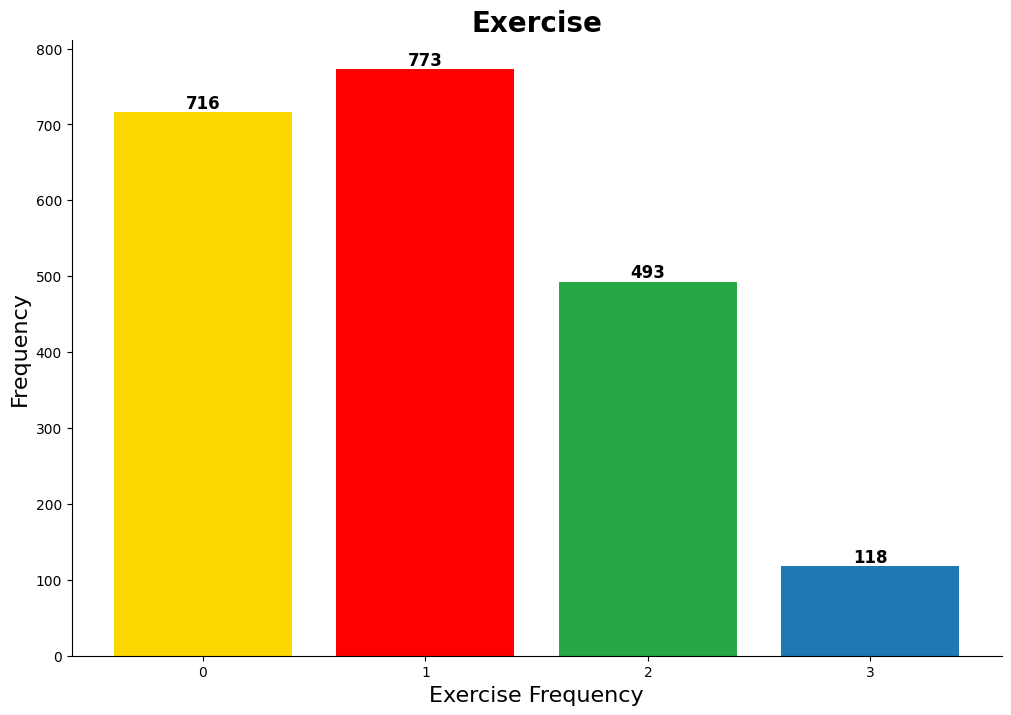

In [18]:
fig, ax = plt.subplots(figsize = (12,8))
exercise_bar = ax.bar(cardio_df['Exercise'].value_counts().index,
                       cardio_df['Exercise'].value_counts().values,
                       color = [RED, ORANGE, GREEN,BLUE])
ax.set_xticks([0,1,2,3])
ax.set_ylabel("Frequency", fontsize = 16)
ax.set_xlabel("Exercise Frequency", fontsize = 16)
ax.set_title("Exercise", fontweight='bold', fontsize = 20)
ax.spines[['right', 'top']].set_visible(False)
for bar in exercise_bar:
    height = bar.get_height()
    ax.text(        
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{int(height)}',  # Converts the count to an integer and adds it as text
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
        )
plt.show()

# Chapter 4 - Bivariate Analysis
This chapter aims to uncover underlying or possible relationships between features and cardiovascular risks
1. [Age vs Cardiovascular Risk](#age-vs-cardiovascular-risk)
2. [BMI vs Cardiovascular Risk](#bmi-vs-cardiovascular-risk)
3. [Gender vs Cardiovascular Risk](#gender-vs-cardiovascular-risk)
4. [Lifestyle vs Cardiovascular Risk](#lifestyle-vs-cardiovascular-risk)

## Age vs Cardiovascular Risk

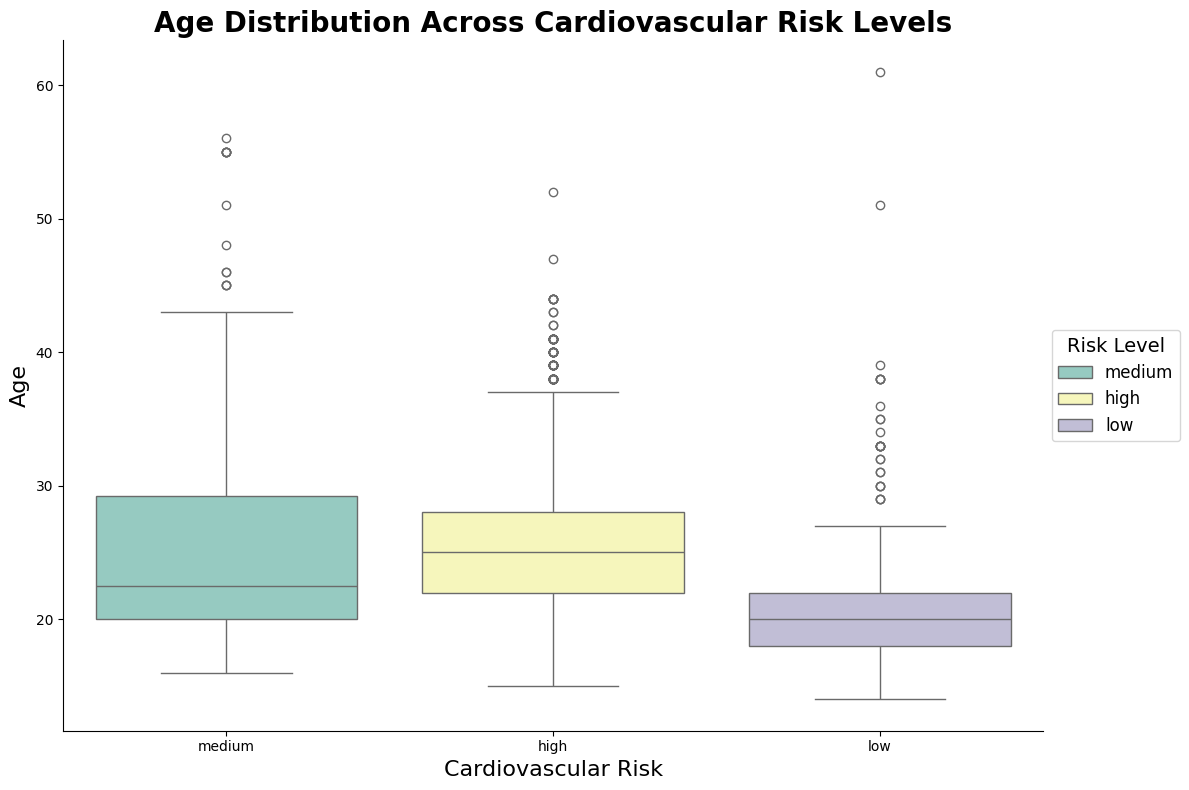

In [19]:
df = cardio_df[["Cardiovascular_risk(y)", "Age"]]

# Create the box plot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Cardiovascular_risk(y)', y='Age', data=df, hue="Cardiovascular_risk(y)", palette="Set3", legend=True)
ax.spines[['right', 'top']].set_visible(False)

# Add labels and title
plt.xlabel('Cardiovascular Risk', fontsize = 16)
plt.ylabel('Age', fontsize = 16)
plt.title('Age Distribution Across Cardiovascular Risk Levels', fontsize = 20, fontweight='bold')
ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), title='Risk Level', fontsize=12, title_fontsize=14 )

plt.tight_layout()
# Display the plot
plt.show()

## BMI vs Cardiovascular Risk

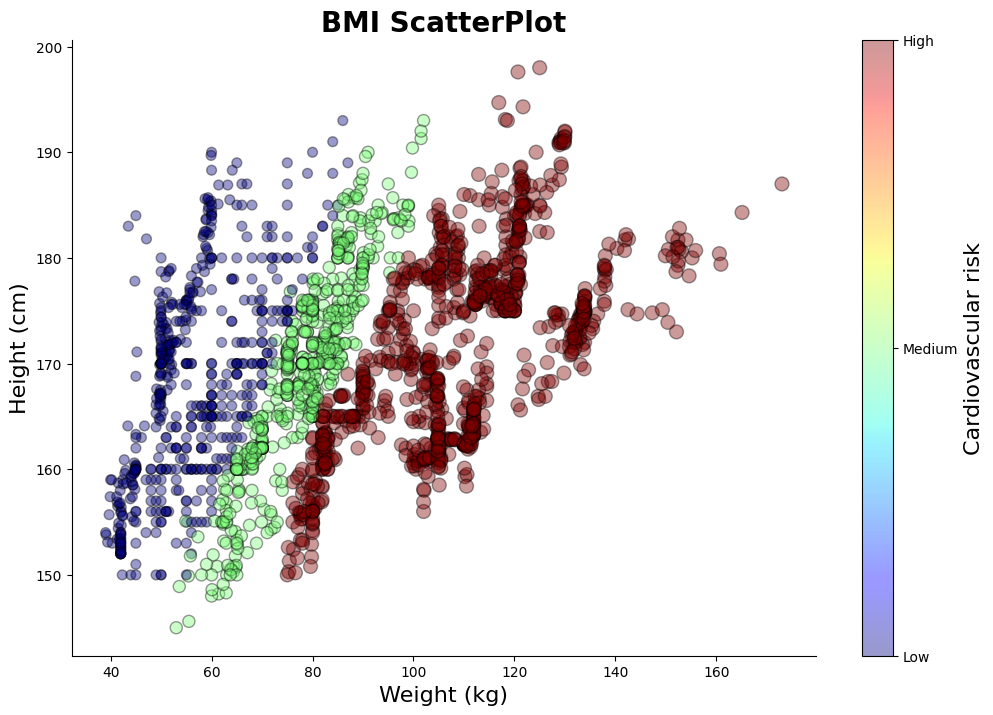

In [20]:
from matplotlib.colors import Normalize
size_mapping = {
    'low': 50,
    'medium': 75,
    'high': 100
}

# Map the 'Cardiovascular_risk' to marker sizes
cardio_df['Size'] = cardio_df['Cardiovascular_risk(y)'].map(size_mapping)
fig, ax = plt.subplots(figsize = (12,8))
sc = ax.scatter(x = cardio_df['Weight(kg)'],
                y = cardio_df['Height(cm)'], 
                alpha = 0.4, 
                s =  cardio_df['Size'], 
                c = cardio_df['Size'],  # Optional: color based on size for better distinction
                cmap='jet',  # Optional: colormap
                norm=Normalize(vmin=cardio_df['Size'].min(), vmax=cardio_df['Size'].max()),
                edgecolors='k'
                )

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Cardiovascular risk', fontsize = 16)
cbar.set_ticks([cardio_df['Size'].min(), cardio_df['Size'].median(), cardio_df['Size'].max()])
cbar.set_ticklabels(['Low', 'Medium','High'])
ax.set_xlabel('Weight (kg)', fontsize = 16)
ax.set_ylabel('Height (cm)', fontsize =16)
ax.set_title("BMI ScatterPlot",fontweight = 'bold', fontsize = 20 )
ax.spines[['right', 'top']].set_visible(False)

plt.show()

## Gender vs Cardiovasular Risk

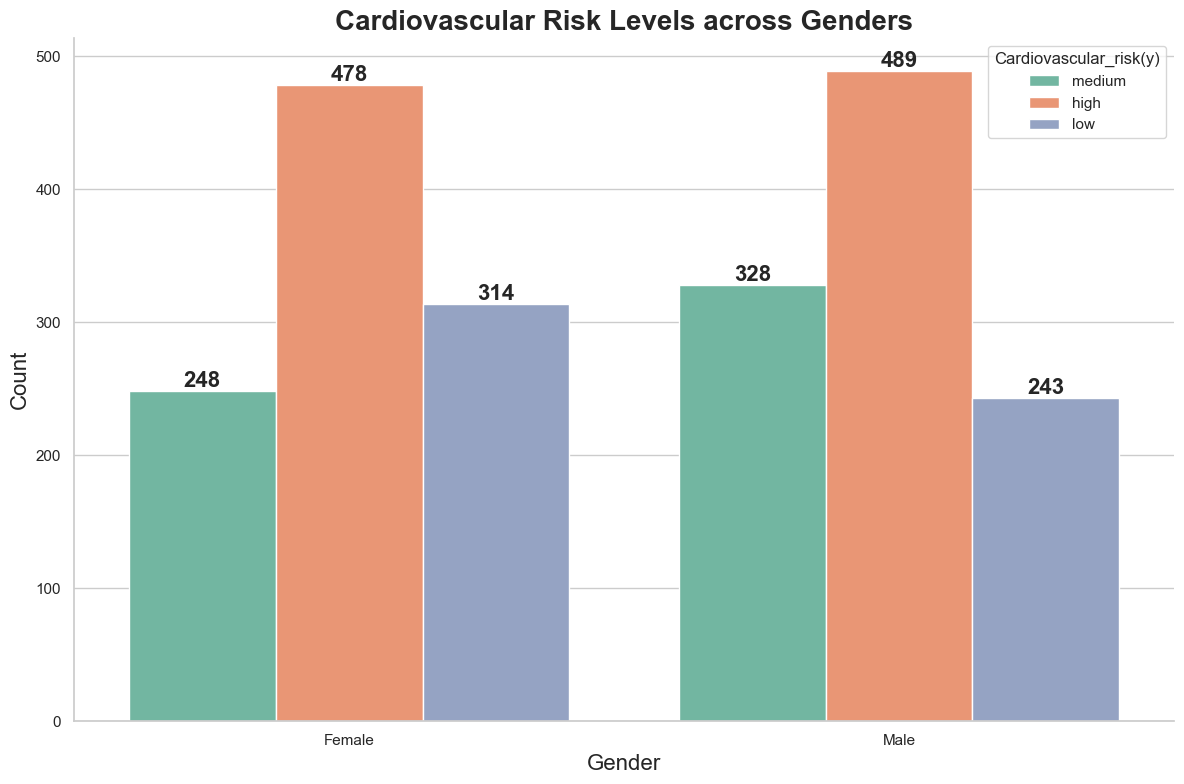

In [21]:
df = cardio_df[["Cardiovascular_risk(y)", "Gender"]]

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Gender', data=df, hue="Cardiovascular_risk(y)", palette="Set2")
ax.spines[['right', 'top']].set_visible(False)

# Add labels and title
plt.xlabel('Gender', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Cardiovascular Risk Levels across Genders', fontsize = 20, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=16, fontweight='bold')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

## Lifestyle vs Cardiovascular Risk

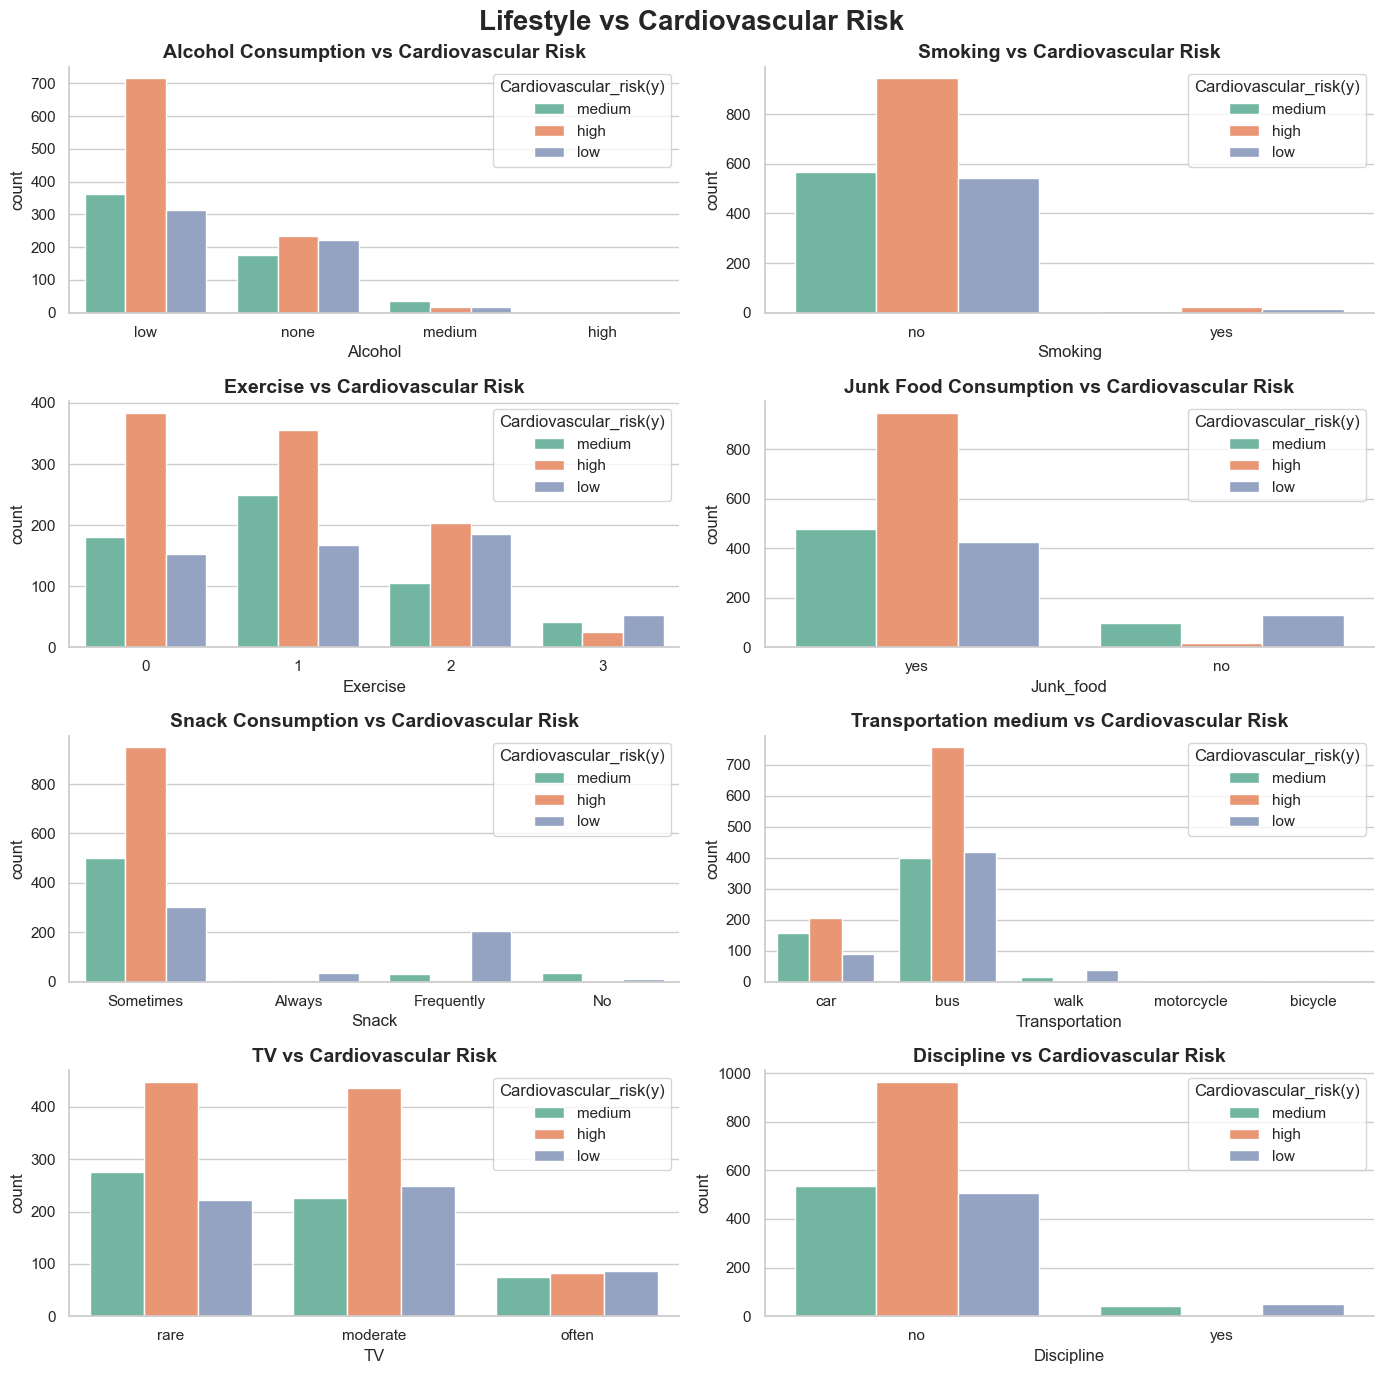

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grouped bar plot for multiple factors
fig, axes = plt.subplots(4, 2, figsize=(14, 14))
# Plot for Alcohol
sns.countplot(ax=axes[0, 0], x='Alcohol', hue='Cardiovascular_risk(y)', data=cardio_df, palette="Set2")
axes[0, 0].set_title('Alcohol Consumption vs Cardiovascular Risk', fontsize = 14, fontweight = 'bold')

# Plot for Smoking
sns.countplot(ax=axes[0, 1], x='Smoking', hue='Cardiovascular_risk(y)', data=cardio_df, palette="Set2")
axes[0, 1].set_title('Smoking vs Cardiovascular Risk', fontsize = 14, fontweight = 'bold')

# Plot for Exercise
sns.countplot(ax=axes[1, 0], x='Exercise', hue='Cardiovascular_risk(y)', data=cardio_df, palette="Set2")
axes[1, 0].set_title('Exercise vs Cardiovascular Risk', fontsize = 14, fontweight = 'bold')

# Plot for Junk Food Consumption
sns.countplot(ax=axes[1, 1], x='Junk_food', hue='Cardiovascular_risk(y)', data=cardio_df, palette="Set2")
axes[1, 1].set_title('Junk Food Consumption vs Cardiovascular Risk',  fontsize = 14, fontweight = 'bold')

sns.countplot(ax=axes[2, 0], x='Snack', hue='Cardiovascular_risk(y)', data=cardio_df, palette="Set2")
axes[2, 0].set_title('Snack Consumption vs Cardiovascular Risk',  fontsize = 14, fontweight = 'bold')

sns.countplot(ax=axes[2, 1], x='Transportation', hue='Cardiovascular_risk(y)', data=cardio_df, palette="Set2")
axes[2, 1].set_title('Transportation medium vs Cardiovascular Risk',  fontsize = 14, fontweight = 'bold')

sns.countplot(ax=axes[3, 0], x='TV', hue='Cardiovascular_risk(y)', data=cardio_df, palette="Set2")
axes[3, 0].set_title('TV vs Cardiovascular Risk',  fontsize = 14, fontweight = 'bold')

sns.countplot(ax=axes[3, 1], x='Discipline', hue='Cardiovascular_risk(y)', data=cardio_df, palette="Set2")
axes[3, 1].set_title('Discipline vs Cardiovascular Risk',  fontsize = 14, fontweight = 'bold')

for ax in axes.flat:
    ax.spines[['right', 'top']].set_visible(False)


plt.suptitle("Lifestyle vs Cardiovascular Risk", fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()


# Chapter 5 - Additional Analysis

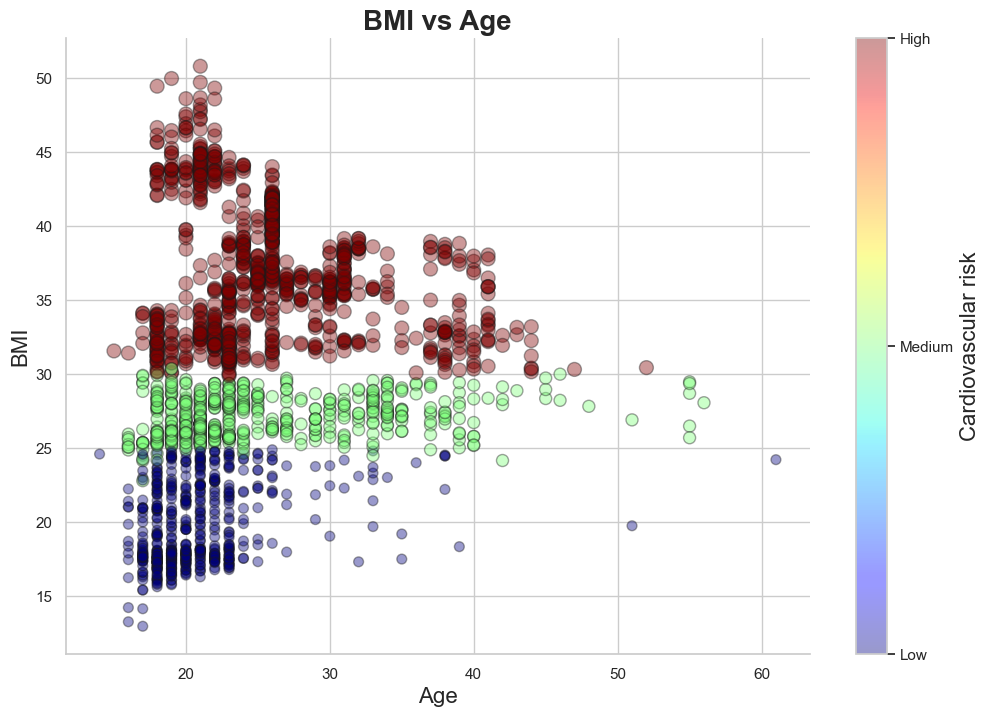

In [23]:
fig, ax = plt.subplots(figsize = (12,8))
sc = ax.scatter(y = (cardio_df['Weight(kg)']/ np.square(cardio_df['Height(cm)']/100)),
                x = cardio_df['Age'], 
                alpha = 0.4, 
                s =  cardio_df['Size'], 
                c = cardio_df['Size'],  # Optional: color based on size for better distinction
                cmap='jet',  # Optional: colormap
                norm=Normalize(vmin=cardio_df['Size'].min(), vmax=cardio_df['Size'].max()),
                edgecolors='k'
                )
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Cardiovascular risk', fontsize = 16)
cbar.set_ticks([cardio_df['Size'].min(), cardio_df['Size'].median(), cardio_df['Size'].max()])
cbar.set_ticklabels(['Low', 'Medium','High'])
ax.set_xlabel('Age', fontsize = 16)
ax.set_ylabel('BMI', fontsize =16)
ax.set_title("BMI vs Age",fontweight = 'bold', fontsize = 20 )
ax.spines[['right', 'top']].set_visible(False)